In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from skimage.filters import unsharp_mask
from skimage.morphology import reconstruction, remove_small_holes, remove_small_objects
from skimage.exposure import rescale_intensity
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

from skimage.feature import peak_local_max
from skimage.filters import sobel
from skimage.segmentation import watershed
from scipy import ndimage as ndi

## Importando o DataSet


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/MyDrive/ProjetoRedesNeurais

X_tr = pd.read_csv('train_images.csv', header = None) # Variável Explicativa - Treino
y_tr = pd.read_csv('train_labels.csv') # Variável de Resposta - Treino

X_tt = pd.read_csv('test_images.csv', header = None) # Variável Explicativa - Teste
y_tt = pd.read_csv('test_labels.csv') # Variável de Resposta - Teste

Mounted at /content/gdrive
/content/gdrive/MyDrive/ProjetoRedesNeurais


In [ ]:
X_tr.describe()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,99.983857,99.980571,100.013429,99.974143,100.08000,100.171286,100.059571,100.187143,100.552286,100.494286,...,100.252714,100.528286,100.589286,100.386000,100.286429,100.332429,100.437286,100.492143,100.145857,100.032143
std,26.499896,26.414896,26.408002,26.439919,26.51432,26.512484,26.631280,26.506073,26.457947,26.677367,...,25.473316,25.447919,25.308967,25.185476,25.096433,25.303697,25.401405,25.313594,25.119432,25.175735
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
50%,101.000000,101.000000,101.000000,101.000000,101.00000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,100.000000,100.000000,101.000000,101.000000,100.000000,100.000000
75%,115.000000,115.000000,115.000000,115.000000,115.00000,115.000000,115.000000,115.000000,116.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,114.000000,114.000000
max,190.000000,186.000000,186.000000,188.000000,192.00000,191.000000,197.000000,202.000000,202.000000,196.000000,...,199.000000,190.000000,184.000000,180.000000,182.000000,177.000000,182.000000,185.000000,179.000000,181.000000


In [ ]:
y_tr.describe()

,Volcano?,Type,Radius,Number Volcanoes
count,7000.000000,1000.000000,1000.000000,1000.000000
mean,0.142857,2.965000,16.257650,1.236000
std,0.349952,0.984248,11.632887,0.553724
min,0.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,5.830000,1.000000
50%,0.000000,3.000000,14.870000,1.000000
75%,0.000000,4.000000,23.555001,1.000000
max,1.000000,4.000000,87.660000,5.000000


In [ ]:
X_tt.describe()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
count,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,...,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000
mean,99.783833,99.767374,99.496708,99.675567,99.615582,100.096928,99.971470,99.945867,100.011339,100.182516,...,99.636064,99.970739,99.997805,99.934528,99.695684,99.852597,99.988661,100.049744,99.647403,99.967081
std,25.892367,25.942547,25.994423,25.857056,25.915149,25.799597,26.139916,26.122442,26.237388,26.235570,...,25.855723,25.922763,25.792950,25.465094,25.404368,25.379156,25.579537,25.534844,25.762290,25.686057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,89.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,89.000000,88.250000,87.250000,88.000000
50%,101.000000,100.000000,100.000000,100.000000,100.000000,100.500000,101.000000,101.000000,100.000000,101.000000,...,100.000000,100.000000,101.000000,101.000000,100.000000,101.000000,101.000000,100.000000,100.000000,100.000000
75%,115.000000,115.000000,114.000000,114.000000,114.000000,114.000000,115.000000,115.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,115.000000,115.000000,115.000000,114.000000
max,188.000000,181.000000,188.000000,191.000000,180.000000,175.000000,188.000000,181.000000,187.000000,188.000000,...,189.000000,174.000000,194.000000,202.000000,188.000000,177.000000,188.000000,186.000000,179.000000,180.000000


In [ ]:
y_tt.describe()

,Volcano?,Type,Radius,Number Volcanoes
count,2734.000000,434.000000,434.000000,434.000000
mean,0.158742,3.011521,15.444977,1.200461
std,0.365502,0.950194,11.144196,0.464837
min,0.000000,1.000000,2.000000,1.000000
25%,0.000000,2.000000,5.660000,1.000000
50%,0.000000,3.000000,13.745000,1.000000
75%,0.000000,4.000000,22.442500,1.000000
max,1.000000,4.000000,80.280000,3.000000


<Axes: xlabel='Volcano?', ylabel='count'>

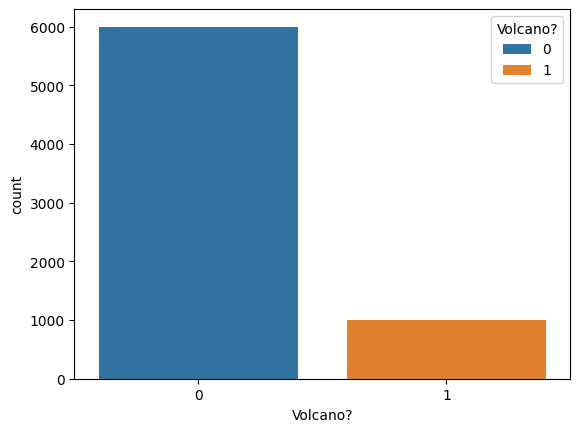

In [ ]:
sns.countplot(x = 'Volcano?', data= y_tr, hue="Volcano?")

Podemos ver que o dataset é desbalanceado a respeito do número de classes 0 e 1

### Exemplo de imagens com vulcão

FIGURAS COM VULCAO


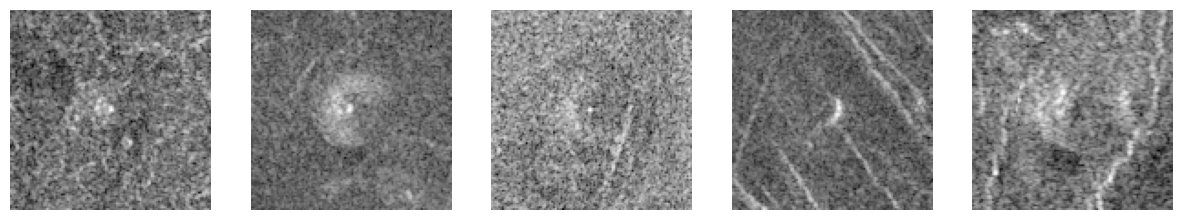

In [ ]:
index_vulc = y_tr[y_tr['Volcano?'] == 1].head().index # Indices das imagens com vulcão
index_vulc5 = index_vulc[0:5] # Escolhendo somente 5 imagens para plotar abaixo

plt.figure(figsize=(15, 5))
print('FIGURAS COM VULCAO')
for i, index in enumerate(index_vulc5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.array(X_tr.iloc[index]).reshape(110, 110), cmap="gray")
    plt.axis("off")
plt.show()

### Exemplo de imagens sem vulcão

FIGURAS SEM VULCAO


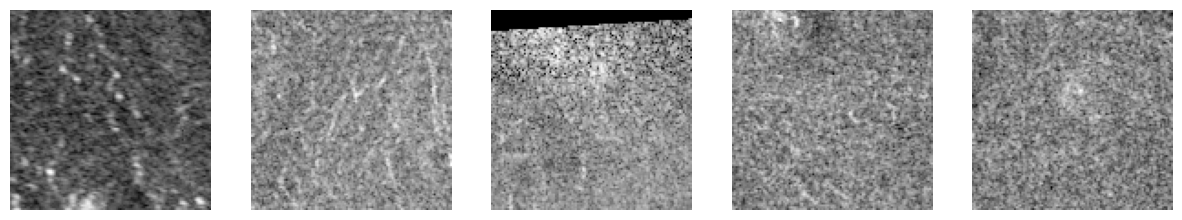

In [ ]:
index_no_vulc = y_tr[y_tr['Volcano?'] == 0].head().index # Indices das imagens com vulcão
index_no_vulc5 = index_no_vulc[0:5] # Escolhendo somente 5 imagens para plotar abaixo

plt.figure(figsize=(15, 5))
print('FIGURAS SEM VULCAO')
for i, index in enumerate(index_no_vulc5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.array(X_tr.iloc[index]).reshape(110, 110), cmap="gray")
    plt.axis("off")
plt.show()

## Processamento da Imagem

### Normalizando para o intervalo $[0,1] $

In [ ]:
X_tr = X_tr / 255
X_tt = X_tt / 255

### Redução da imagem

Quando há vulcão na imagem ele se encontra centralizada, então para reduzir um pouco do nosso custo computacional e acelarar o código iremos pegar o quadrado central da imagem 110x100

In [ ]:
larg_quad_menor = 50         # Iremos pegar o recorte 50x50 do quadrado central da imagem 110x100


def dots_out(larg_df = 110, larg = larg_quad_menor):
  '''
  A função retorna os indices que estão fora do quadrado central da imagem de largura escolhida (Largura do quadrado menor = larg_quad_menor)
  Largura total da foto = larg_df
  '''

  x = (larg_df - larg)/2

  idx_o = []

  for i in range(larg):
    linha = np.arange(larg_df*(x+i) + x, larg_df*(x+i) + x + larg)
    for j in linha:
      idx_o.append(int(j)) # índices do quadrado centrado na origem com largura larg_quad_menor

  idx_total = np.arange(0, larg_df**2)

  idx_out = []

  for k in idx_total:
    idx_out.append(int(k))

  for z in idx_o:  # removendo os índices do quadrado com centro na origem e largura larg_quad_menor
    idx_out.remove(z)

  return idx_out

In [ ]:
idx_out = dots_out() # Índices fora do quadrado centralizado

X_tr = X_tr.drop(idx_out, axis = 1) # Imagem 50x50 no conjunto de treino
X_tt = X_tt.drop(idx_out, axis = 1) # Imagem 50x50 no conjunto de teste

# Reordenando as colunas das imagens
X_tr.columns = [i for i in range(larg_quad_menor**2)]
X_tt.columns = [i for i in range(larg_quad_menor**2)]

### Melhorando a qualidade da imagem

Aqui eu peguei a imagem do indíce 9 do Dataset de Treino que tem 1 vulcão nela localizada no centro para mostrar como exemplo no aumento de contraste

O único pré-processamento usado nessa base foi uma tentativa de melhorar a qualidade da imagem com unsharped_mask (https://scikit-image.org/docs/stable/auto_examples/filters/plot_unsharp_mask.html)

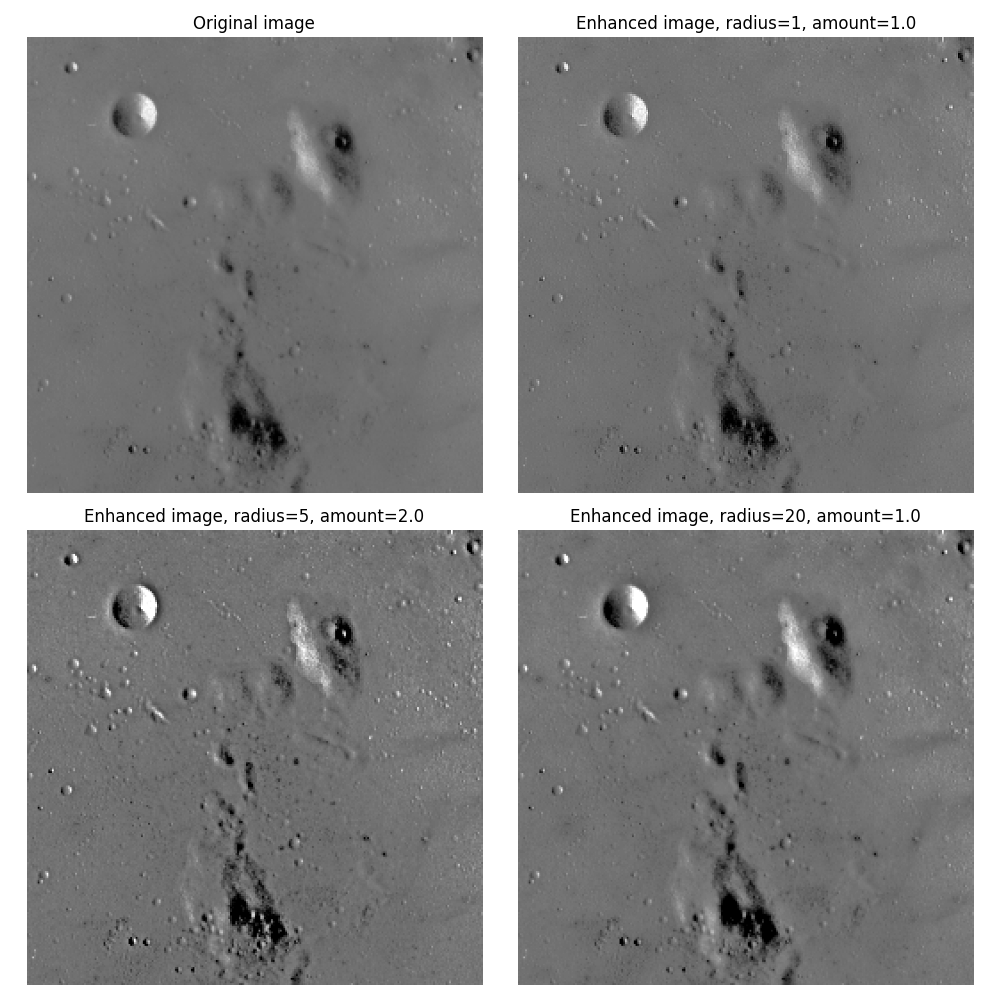

Figura Com Vulcão
Volcano?             1.00
Type                 1.00
Radius              22.02
Number Volcanoes     1.00
Name: 9, dtype: float64


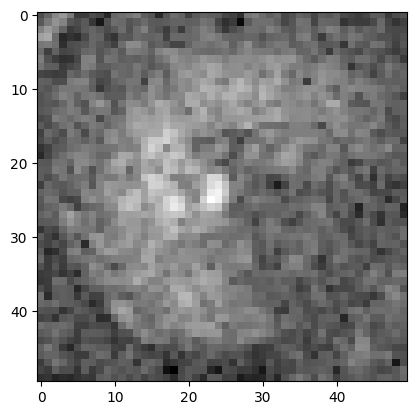

In [ ]:
img = np.array(X_tr.iloc[9]).reshape((50,50))

print("Figura Com Vulcão")
print(y_tr.iloc[9])

plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [ ]:
img = np.array(X_tr.iloc[9]).reshape((50,50))

img1 = unsharp_mask(img, radius=1, amount=1)
img2 = unsharp_mask(img, radius=5, amount=2)
img3 = unsharp_mask(img, radius=20, amount=1)

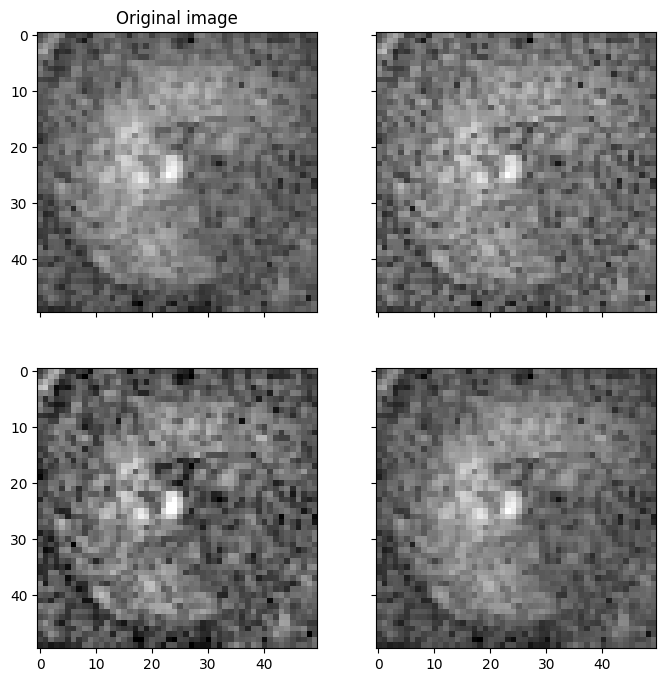

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(img1, cmap=plt.cm.gray)
ax[2].imshow(img2, cmap=plt.cm.gray)
ax[3].imshow(img3, cmap=plt.cm.gray)

In [ ]:
X_tr_pp = []       # Imagens do treino que passaram por pré-processamento
X_tt_pp = []       # Imagens do teste que passaram por pré-processamento

for i in range(len(X_tr)):
  image = np.array(X_tr.iloc[i]).reshape((50,50))
  image = unsharp_mask(image, radius=5, amount=1)

  X_tr_pp.append(image.flatten())

X_tr_pp = pd.DataFrame(X_tr_pp)

for i in range(len(X_tt)):
  image = np.array(X_tt.iloc[i]).reshape((50,50))
  image = unsharp_mask(image, radius=5, amount=1)

  seed = np.copy(image)
  seed[1:-1, 1:-1] = image.max()
  mask = image
  filled = reconstruction(seed, mask, method='erosion')

  X_tt_pp.append(filled.flatten())

X_tt_pp = pd.DataFrame(X_tt_pp)

In [ ]:
print(np.shape(X_tr), np.shape(X_tt), np.shape(X_tr_pp), np.shape(X_tt_pp))

(7000, 2500) (2734, 2500) (7000, 2500) (2734, 2500)


In [ ]:
X_tr = np.resize(X_tr,     (7000, 50, 50, 1))
X_tt = np.resize(X_tt,     (2734, 50, 50, 1))

X_tr_pp = np.resize(X_tr_pp,     (7000, 50, 50, 1))
X_tt_pp = np.resize(X_tt_pp,     (2734, 50, 50, 1))

In [ ]:
print(np.shape(X_tr), np.shape(X_tt), np.shape(X_tr_pp), np.shape(X_tt_pp))

(7000, 50, 50, 1) (2734, 50, 50, 1) (7000, 50, 50, 1) (2734, 50, 50, 1)


In [ ]:
def model_evaluation(model, X_test, y_test):
    histo = pd.DataFrame(model.history.history)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Ajuste o tamanho da figura conforme necessário

    for idx, metric in enumerate([['accuracy', 'val_accuracy'], ['loss', 'val_loss']]):
        histo[metric].plot(ax=axs[idx])
        axs[idx].set_title(' and '.join(metric))

    plt.tight_layout()
    plt.show()

    pred = model.predict(X_test).flatten()
    y_pred = np.where(pred > 0.5, 1, 0) ## Fazendo ajustes para calcular as métricas, pois previsões são floats entre 0 e 1, porém nossos labels são binários
    print(classification_report(y_test, y_pred, target_names=['No Volcanos', 'Volcanos']))
    display(pd.DataFrame(confusion_matrix(y_test, y_pred),
                         columns=['Predicted No Volcanos', 'Predicted Volcanos'],
                         index=['No Volcanos', 'Volcanos']))
    print(f'Accuracy: {round(accuracy_score(y_test, y_pred), 5)}')

## Modelos de Redes Neurais

### CNN - 1 Camadas Convulocional + 1 camada MLP ao final (sem contar a de saída) + 1 Regularização Droupout

In [ ]:
modelCNN = tf.keras.models.Sequential()

modelCNN.add(tf.keras.layers.Conv2D(filters = 4, kernel_size = (5, 5), padding = 'same', activation='relu', input_shape=(50, 50, 1))) # Output 50x50x4
modelCNN.add(tf.keras.layers.MaxPool2D(pool_size=(10, 10))) # output 5x5x4

modelCNN.add(tf.keras.layers.Flatten()) # output 100
modelCNN.add(tf.keras.layers.Dense(10, activation='relu') )
modelCNN.add(tf.keras.layers.Dropout(0.5))
modelCNN.add(tf.keras.layers.Dense(1) )

In [ ]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 4)         104       
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 5, 4)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                        

### CNN - 4 Camadas Convulocionais + 2 camadas MLP ao final + 2 Regularizações Droupout

In [ ]:
modelCNN2 = tf.keras.models.Sequential()

modelCNN2.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (4, 4), padding = 'same', activation='relu', input_shape=(50, 50, 1)))
modelCNN2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

modelCNN2.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (4, 4), activation='relu'))
modelCNN2.add(tf.keras.layers.MaxPool2D( pool_size=(2, 2) ) )

modelCNN2.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (4, 4), activation='relu'))
modelCNN2.add(tf.keras.layers.MaxPool2D( pool_size=(2, 2) ) )

modelCNN2.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (4, 4), activation='relu'))
modelCNN2.add(tf.keras.layers.Dropout(0.5))

modelCNN2.add(tf.keras.layers.Flatten())

modelCNN2.add(tf.keras.layers.Dense(32, activation='relu') )
modelCNN2.add(tf.keras.layers.Dense(16, activation='relu') )
modelCNN2.add(tf.keras.layers.Dropout(0.5))
modelCNN2.add(tf.keras.layers.Dense(1) )

In [ ]:
modelCNN2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 50, 50, 8)         136       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 11, 11, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          8224      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 32)         

### Rodando nas imagens sem pré-processamento (Apenas reescaladas para o intervalo $[0,1]$ )

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_tr,
                                                  y_tr['Volcano?'],
                                                  test_size=0.2)

### Dataset desbalanceado -> fazendo os pesos de cada classe
from sklearn.utils.class_weight import compute_class_weight

# Definindo as classes
classes = np.array([0, 1])

# Calculando os pesos das classes
class_weights = compute_class_weight('balanced', classes=classes, y=y_tr['Volcano?'])
class_weight_dict = dict(zip(classes, class_weights))

print(class_weight_dict)

{0: 0.5833333333333334, 1: 3.5}


#### Treino do Modelo CNN

In [ ]:
modelCNN.compile(optimizer=tf.optimizers.RMSprop(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])   #RMSprop nas vezes que testei funcionou melhor do que SGD e Adam nessa base de dados


modelCNN.fit(X_train, y_train, epochs=40, batch_size=64, validation_data = (X_val, y_val), class_weight=class_weight_dict)

Epoch 1/40
88/88 [==============================] - 9s 86ms/step - loss: 2.7902 - accuracy: 0.7539 - val_loss: 0.5165 - val_accuracy: 0.8629
Epoch 2/40
88/88 [==============================] - 8s 86ms/step - loss: 0.8859 - accuracy: 0.6843 - val_loss: 0.5121 - val_accuracy: 0.8629
Epoch 3/40
88/88 [==============================] - 8s 86ms/step - loss: 0.7819 - accuracy: 0.6986 - val_loss: 0.5490 - val_accuracy: 0.8629
Epoch 4/40
88/88 [==============================] - 7s 84ms/step - loss: 0.7474 - accuracy: 0.7023 - val_loss: 0.6009 - val_accuracy: 0.8571
Epoch 5/40
88/88 [==============================] - 9s 100ms/step - loss: 0.6944 - accuracy: 0.6868 - val_loss: 0.5446 - val_accuracy: 0.8643
Epoch 6/40
88/88 [==============================] - 7s 84ms/step - loss: 0.6782 - accuracy: 0.7505 - val_loss: 0.4555 - val_accuracy: 0.8686
Epoch 7/40
88/88 [==============================] - 8s 87ms/step - loss: 0.6197 - accuracy: 0.7570 - val_loss: 0.5544 - val_accuracy: 0.8979
Epoch 8/40
8

#### Resultados no conjunto de Teste

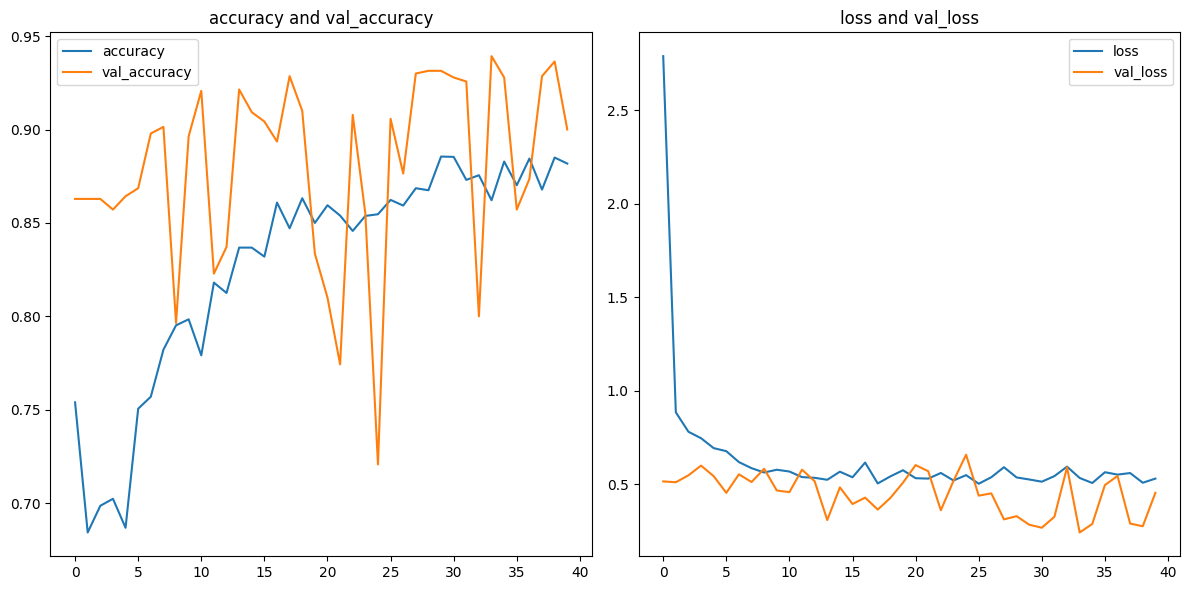

86/86 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

 No Volcanos       0.98      0.91      0.94      2300
    Volcanos       0.65      0.88      0.75       434

    accuracy                           0.91      2734
   macro avg       0.81      0.89      0.84      2734
weighted avg       0.92      0.91      0.91      2734



,Predicted No Volcanos,Predicted Volcanos
No Volcanos,2095,205
Volcanos,53,381


Accuracy: 0.90563


In [ ]:
model_evaluation(modelCNN, X_tt, y_tt['Volcano?'])

#### Treino do Modelo CNN2

In [ ]:
modelCNN2.compile(optimizer=tf.optimizers.RMSprop(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


modelCNN2.fit(X_train, y_train, epochs=40, batch_size=64, validation_data = (X_val, y_val), class_weight=class_weight_dict)

Epoch 1/40
88/88 [==============================] - 12s 121ms/step - loss: 2.2527 - accuracy: 0.7704 - val_loss: 0.4625 - val_accuracy: 0.8629
Epoch 2/40
88/88 [==============================] - 8s 89ms/step - loss: 0.7974 - accuracy: 0.6979 - val_loss: 0.5251 - val_accuracy: 0.8629
Epoch 3/40
88/88 [==============================] - 10s 115ms/step - loss: 0.7155 - accuracy: 0.6796 - val_loss: 0.4817 - val_accuracy: 0.9179
Epoch 4/40
88/88 [==============================] - 9s 101ms/step - loss: 0.5665 - accuracy: 0.8396 - val_loss: 0.3905 - val_accuracy: 0.9079
Epoch 5/40
88/88 [==============================] - 9s 107ms/step - loss: 0.5459 - accuracy: 0.9064 - val_loss: 0.6078 - val_accuracy: 0.9086
Epoch 6/40
88/88 [==============================] - 11s 120ms/step - loss: 0.6463 - accuracy: 0.9139 - val_loss: 0.4593 - val_accuracy: 0.9143
Epoch 7/40
88/88 [==============================] - 8s 91ms/step - loss: 0.5930 - accuracy: 0.9175 - val_loss: 0.3684 - val_accuracy: 0.9186
Epoch

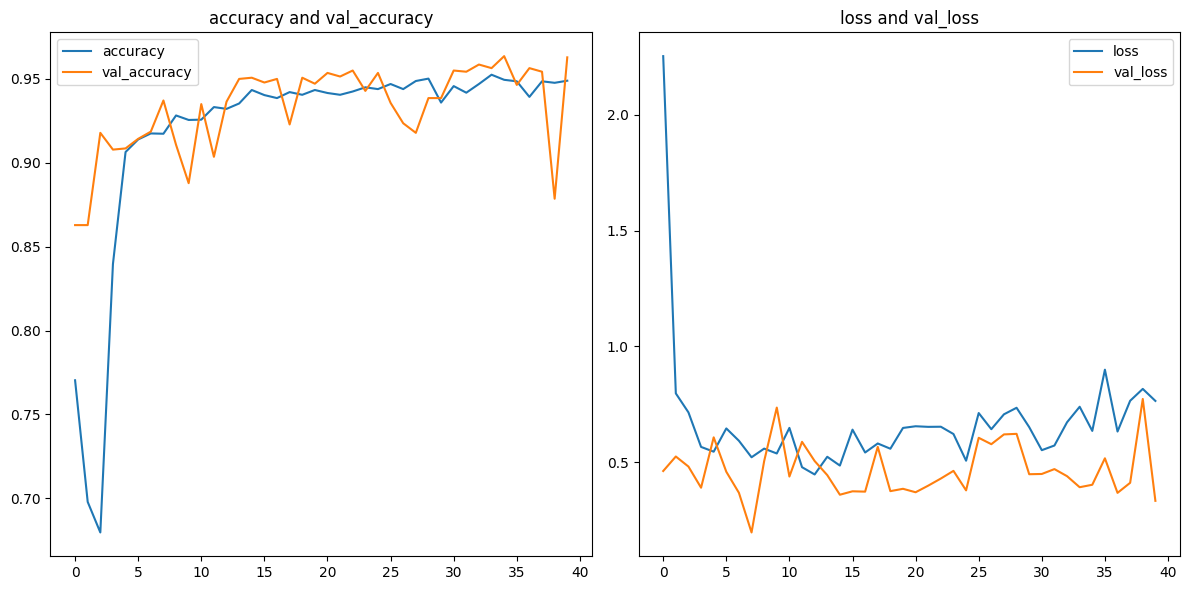

86/86 [==============================] - 2s 17ms/step
              precision    recall  f1-score   support

 No Volcanos       0.97      0.99      0.98      2300
    Volcanos       0.92      0.86      0.89       434

    accuracy                           0.97      2734
   macro avg       0.95      0.92      0.93      2734
weighted avg       0.97      0.97      0.97      2734



,Predicted No Volcanos,Predicted Volcanos
No Volcanos,2267,33
Volcanos,60,374


Accuracy: 0.96598


In [ ]:
model_evaluation(modelCNN2, X_tt, y_tt['Volcano?'])

### Rodando nas imagens com pré-processamento

In [ ]:
X_train_pp, X_val_pp, y_train_pp, y_val_pp = train_test_split(X_tr_pp,
                                                    y_tr['Volcano?'],
                                                    test_size=0.2)

#### Redefinindo as mesmas arquiteturas anteriores, mas iremos dar o fit num dataset novo com imagens que passaram por um pré-processamento (pp)

In [ ]:
modelCNN_pp = tf.keras.models.Sequential()

modelCNN_pp.add(tf.keras.layers.Conv2D(filters = 4, kernel_size = (5, 5), padding = 'same', activation='relu', input_shape=(50, 50, 1))) # Output 50x50x4
modelCNN_pp.add(tf.keras.layers.MaxPool2D(pool_size=(10, 10))) # output 5x5x4

modelCNN_pp.add(tf.keras.layers.Flatten()) # output 100
modelCNN_pp.add(tf.keras.layers.Dense(10, activation='relu') )
modelCNN_pp.add(tf.keras.layers.Dropout(0.5))
modelCNN_pp.add(tf.keras.layers.Dense(1) )

In [ ]:
modelCNN2_pp = tf.keras.models.Sequential()

modelCNN2_pp.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (4, 4), padding = 'same', activation='relu', input_shape=(50, 50, 1)))
modelCNN2_pp.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

modelCNN2_pp.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (4, 4), activation='relu'))
modelCNN2_pp.add(tf.keras.layers.MaxPool2D( pool_size=(2, 2) ) )

modelCNN2_pp.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (4, 4), activation='relu'))
modelCNN2_pp.add(tf.keras.layers.MaxPool2D( pool_size=(2, 2) ) )

modelCNN2_pp.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (4, 4), activation='relu'))
modelCNN2_pp.add(tf.keras.layers.Dropout(0.5))

modelCNN2_pp.add(tf.keras.layers.Flatten())

modelCNN2_pp.add(tf.keras.layers.Dense(32, activation='relu') )
modelCNN2_pp.add(tf.keras.layers.Dense(16, activation='relu') )
modelCNN2_pp.add(tf.keras.layers.Dropout(0.5))
modelCNN2_pp.add(tf.keras.layers.Dense(1) )

#### Treino do Modelo CNN_pp

In [ ]:
modelCNN_pp.compile(optimizer=tf.optimizers.RMSprop(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


modelCNN_pp.fit(X_train_pp, y_train_pp, epochs=40, batch_size=64, validation_data = (X_val_pp, y_val_pp), class_weight=class_weight_dict)

Epoch 1/40
88/88 [==============================] - 9s 89ms/step - loss: 0.9592 - accuracy: 0.6855 - val_loss: 0.4125 - val_accuracy: 0.8536
Epoch 2/40
88/88 [==============================] - 10s 110ms/step - loss: 0.8268 - accuracy: 0.6904 - val_loss: 0.5015 - val_accuracy: 0.8471
Epoch 3/40
88/88 [==============================] - 8s 92ms/step - loss: 0.7426 - accuracy: 0.6968 - val_loss: 0.5186 - val_accuracy: 0.8593
Epoch 4/40
88/88 [==============================] - 8s 86ms/step - loss: 0.6967 - accuracy: 0.7246 - val_loss: 0.5603 - val_accuracy: 0.8643
Epoch 5/40
88/88 [==============================] - 7s 85ms/step - loss: 0.6762 - accuracy: 0.7541 - val_loss: 0.5056 - val_accuracy: 0.8836
Epoch 6/40
88/88 [==============================] - 8s 90ms/step - loss: 0.6248 - accuracy: 0.7859 - val_loss: 0.4319 - val_accuracy: 0.9071
Epoch 7/40
88/88 [==============================] - 7s 81ms/step - loss: 0.6007 - accuracy: 0.7905 - val_loss: 0.4322 - val_accuracy: 0.9071
Epoch 8/40


#### Resultados no conjunto de Teste

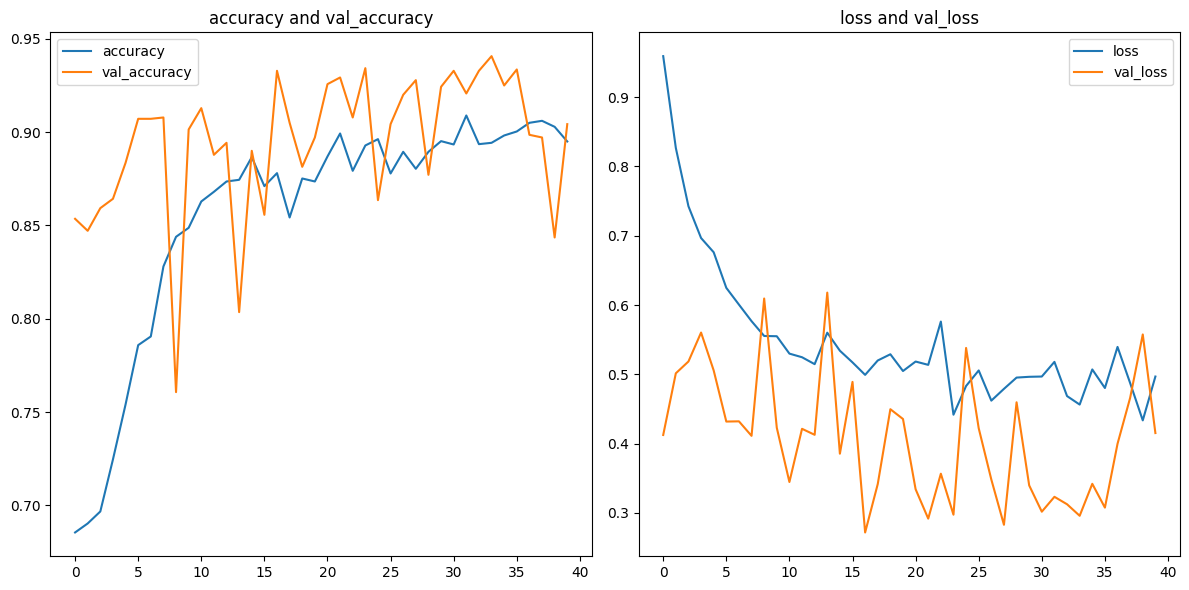

86/86 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

 No Volcanos       0.98      0.91      0.94      2300
    Volcanos       0.64      0.88      0.74       434

    accuracy                           0.90      2734
   macro avg       0.81      0.89      0.84      2734
weighted avg       0.92      0.90      0.91      2734



,Predicted No Volcanos,Predicted Volcanos
No Volcanos,2089,211
Volcanos,53,381


Accuracy: 0.90344


In [ ]:
model_evaluation(modelCNN_pp, X_tt_pp, y_tt['Volcano?'])

#### Treino do Modelo CNN2_pp

In [ ]:
modelCNN2_pp.compile(optimizer=tf.optimizers.RMSprop(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


modelCNN2_pp.fit(X_train_pp, y_train_pp, epochs=40, batch_size=64, validation_data = (X_val_pp, y_val_pp), class_weight=class_weight_dict)

Epoch 1/40
88/88 [==============================] - 12s 124ms/step - loss: 1.1750 - accuracy: 0.7264 - val_loss: 0.4792 - val_accuracy: 0.8550
Epoch 2/40
88/88 [==============================] - 8s 93ms/step - loss: 0.7864 - accuracy: 0.7255 - val_loss: 0.4545 - val_accuracy: 0.8550
Epoch 3/40
88/88 [==============================] - 11s 122ms/step - loss: 0.6116 - accuracy: 0.8245 - val_loss: 0.3333 - val_accuracy: 0.9107
Epoch 4/40
88/88 [==============================] - 10s 111ms/step - loss: 0.5328 - accuracy: 0.8920 - val_loss: 0.2460 - val_accuracy: 0.9279
Epoch 5/40
88/88 [==============================] - 9s 100ms/step - loss: 0.4346 - accuracy: 0.9146 - val_loss: 0.3066 - val_accuracy: 0.9386
Epoch 6/40
88/88 [==============================] - 11s 125ms/step - loss: 0.4903 - accuracy: 0.9225 - val_loss: 0.3379 - val_accuracy: 0.9450
Epoch 7/40
88/88 [==============================] - 9s 106ms/step - loss: 0.5497 - accuracy: 0.9298 - val_loss: 0.3851 - val_accuracy: 0.9286
Epo

#### Resultados no conjunto de teste

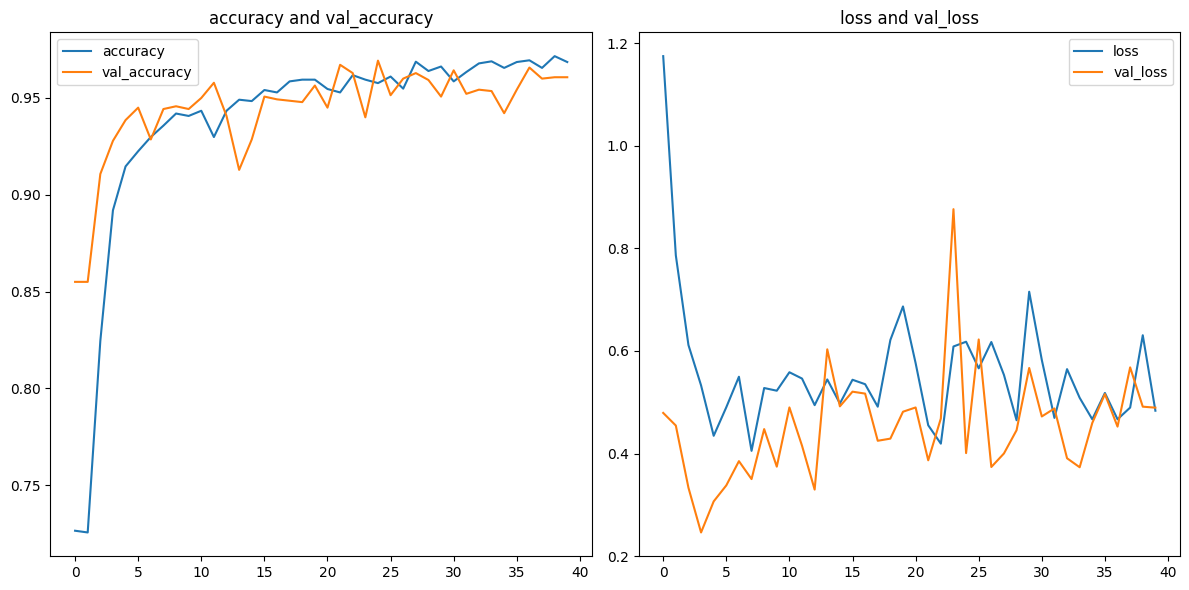

86/86 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

 No Volcanos       0.98      0.98      0.98      2300
    Volcanos       0.88      0.90      0.89       434

    accuracy                           0.96      2734
   macro avg       0.93      0.94      0.93      2734
weighted avg       0.96      0.96      0.96      2734



,Predicted No Volcanos,Predicted Volcanos
No Volcanos,2245,55
Volcanos,45,389


Accuracy: 0.96342


In [ ]:
model_evaluation(modelCNN2_pp, X_tt_pp, y_tt['Volcano?'])

Quando rodamos as Redes Convolucionais, percebemos uma queda no número de falsos positivos de forma bem significativa (em mais de 50% nas duas redes CNN usadas), enquanto há um aumento de falsos negativos em quase 20%.

Considero esse balanço final com as imagens suavizadas um resultado positivo

### Combinação dos modelos

#### Combinação e testando nas imagens sem pré-processamento

In [ ]:
# Definir a entrada para o modelo ensemble
input_shape = (50, 50, 1)
input_layer = tf.keras.layers.Input(shape=input_shape)

# Obter as saídas dos dois modelos
output1 = modelCNN(input_layer)
output2 = modelCNN2(input_layer)
ensemble_output = tf.keras.layers.Average()([output1, output2])

ensemble_model = tf.keras.models.Model(inputs=input_layer, outputs=ensemble_output)

In [ ]:
ensemble_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 50, 50, 1)]          0         []                            
                                                                                                  
 sequential (Sequential)     (None, 1)                    1125      ['input_1[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 1)                    45881     ['input_1[0][0]']             
                                                                                                  
 average (Average)           (None, 1)                    0         ['sequential[0][0]',          
                                                                     'sequential_1[0][0]']    

In [ ]:
ensemble_model.compile(optimizer=tf.optimizers.RMSprop(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


ensemble_model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data = (X_val, y_val), class_weight=class_weight_dict)

Epoch 1/40
88/88 [==============================] - 19s 184ms/step - loss: 0.7628 - accuracy: 0.9421 - val_loss: 0.3749 - val_accuracy: 0.9593
Epoch 2/40
88/88 [==============================] - 17s 189ms/step - loss: 0.7646 - accuracy: 0.9536 - val_loss: 0.4798 - val_accuracy: 0.9579
Epoch 3/40
88/88 [==============================] - 16s 180ms/step - loss: 0.6879 - accuracy: 0.9548 - val_loss: 0.6348 - val_accuracy: 0.9057
Epoch 4/40
88/88 [==============================] - 17s 189ms/step - loss: 0.6667 - accuracy: 0.9518 - val_loss: 0.5051 - val_accuracy: 0.9500
Epoch 5/40
88/88 [==============================] - 15s 175ms/step - loss: 0.7232 - accuracy: 0.9513 - val_loss: 0.5266 - val_accuracy: 0.9536
Epoch 6/40
88/88 [==============================] - 17s 190ms/step - loss: 0.7932 - accuracy: 0.9546 - val_loss: 0.4759 - val_accuracy: 0.9579
Epoch 7/40
88/88 [==============================] - 16s 181ms/step - loss: 1.0567 - accuracy: 0.9586 - val_loss: 0.4523 - val_accuracy: 0.9629

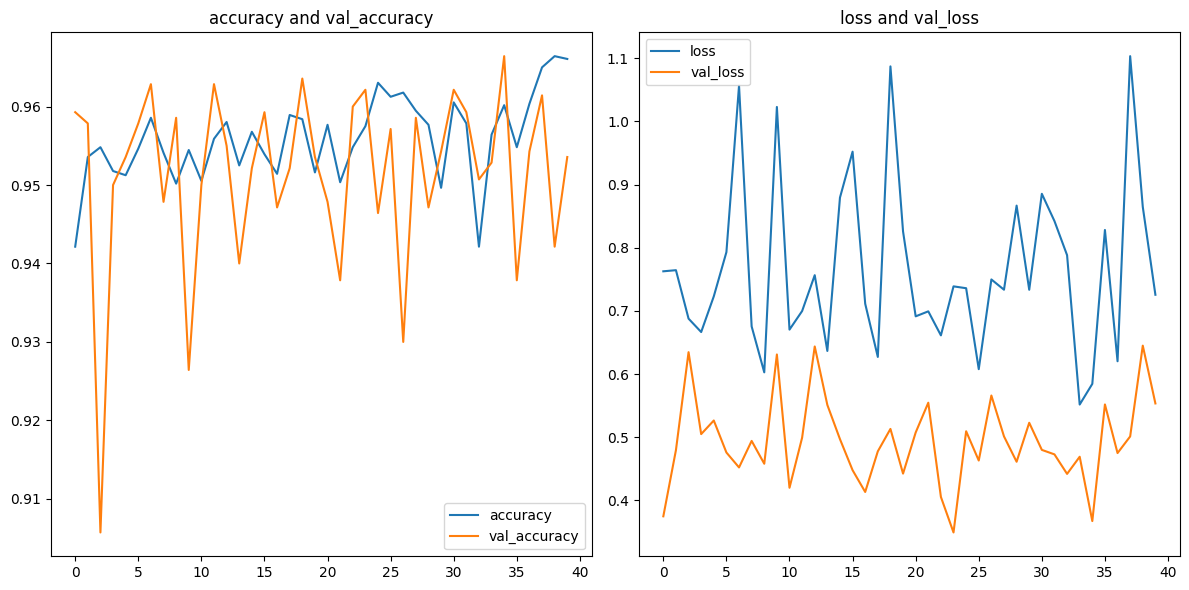

86/86 [==============================] - 3s 30ms/step
              precision    recall  f1-score   support

 No Volcanos       0.98      0.97      0.97      2300
    Volcanos       0.84      0.91      0.87       434

    accuracy                           0.96      2734
   macro avg       0.91      0.94      0.92      2734
weighted avg       0.96      0.96      0.96      2734



,Predicted No Volcanos,Predicted Volcanos
No Volcanos,2226,74
Volcanos,41,393


Accuracy: 0.95794


In [ ]:
model_evaluation(ensemble_model, X_tt, y_tt['Volcano?'])

#### Combinação e testando nas imagens sem pré-processamento

In [ ]:
# Definir a entrada para o modelo ensemble
input_shape = (50, 50, 1)
input_layer = tf.keras.layers.Input(shape=input_shape)

# Obter as saídas dos dois modelos
output1 = modelCNN_pp(input_layer)
output2 = modelCNN2_pp(input_layer)
ensemble_output = tf.keras.layers.Average()([output1, output2])

ensemble_model_pp = tf.keras.models.Model(inputs=input_layer, outputs=ensemble_output)

In [ ]:
ensemble_model_pp.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 50, 50, 1)]          0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 1)                    1125      ['input_2[0][0]']             
                                                                                                  
 sequential_3 (Sequential)   (None, 1)                    45881     ['input_2[0][0]']             
                                                                                                  
 average_1 (Average)         (None, 1)                    0         ['sequential_2[0][0]',        
                                                                     'sequential_3[0][0]']  

In [ ]:
ensemble_model_pp.compile(optimizer=tf.optimizers.RMSprop(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

ensemble_model_pp.fit(X_train_pp, y_train_pp, epochs=40, batch_size=64, validation_data = (X_val_pp, y_val_pp), class_weight=class_weight_dict)

Epoch 1/40
88/88 [==============================] - 19s 191ms/step - loss: 0.5636 - accuracy: 0.9698 - val_loss: 0.4376 - val_accuracy: 0.9536
Epoch 2/40
88/88 [==============================] - 16s 176ms/step - loss: 0.4734 - accuracy: 0.9680 - val_loss: 0.5449 - val_accuracy: 0.9614
Epoch 3/40
88/88 [==============================] - 16s 184ms/step - loss: 0.6102 - accuracy: 0.9698 - val_loss: 0.9290 - val_accuracy: 0.9379
Epoch 4/40
88/88 [==============================] - 17s 187ms/step - loss: 0.4414 - accuracy: 0.9663 - val_loss: 0.4659 - val_accuracy: 0.9593
Epoch 5/40
88/88 [==============================] - 16s 184ms/step - loss: 0.7157 - accuracy: 0.9721 - val_loss: 0.5268 - val_accuracy: 0.9614
Epoch 6/40
88/88 [==============================] - 16s 185ms/step - loss: 0.4992 - accuracy: 0.9737 - val_loss: 0.4771 - val_accuracy: 0.9621
Epoch 7/40
88/88 [==============================] - 17s 190ms/step - loss: 0.4581 - accuracy: 0.9743 - val_loss: 0.3963 - val_accuracy: 0.9650

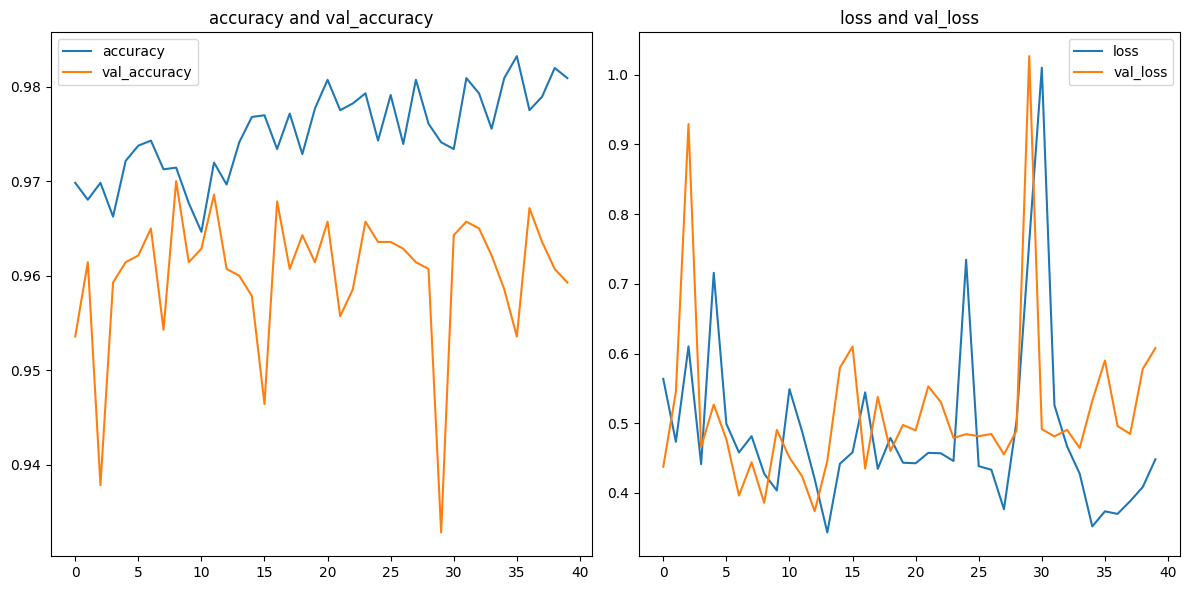

86/86 [==============================] - 3s 31ms/step
              precision    recall  f1-score   support

 No Volcanos       0.97      0.99      0.98      2300
    Volcanos       0.95      0.84      0.89       434

    accuracy                           0.97      2734
   macro avg       0.96      0.92      0.94      2734
weighted avg       0.97      0.97      0.97      2734



,Predicted No Volcanos,Predicted Volcanos
No Volcanos,2280,20
Volcanos,70,364


Accuracy: 0.96708


In [ ]:
model_evaluation(ensemble_model_pp, X_tt_pp, y_tt['Volcano?'])

## Comentários Finais

Quando trabalhei com essa base de dados em Aprendizado de Máquina com o Professor Hugo, apenas o unsharp_mask fez uma diferença bem significativa para a melhora dos modelos.

Dessa vez em Redes Neurais, consegui atingir métricas rapidamente mesmo com uma rede CNN bem simples e quando adicionei mais camadas consegui resultados melhores e bastante satisfatórios com a Rede que chamei de CNN2

A melhora da qualidade da imagem passando por um pré-processamento de unsharp_mask teve um efeito na maioria dos casos de redução considerável de falsos postivos (Prever vulcão em imagens sem vulcão), enquanto aumentou o número de falsos negativos (Não prever vulcão em imagens com vulcão).

Achei o uso do unsharp_mask bem satisfatório, principalmente no modelo com ensamble das duas redes CNN e CNN2.

